## 1. 사진 모으기

### 1-1 . 내사진
  - 2장 이상, 내 얼굴 끼리 임베딩 벡터 거리를 구해보기.
  
### 1-2. 연예인 사진
   - 많이 모으기
   
   
## 2. 얼굴 영역 자르기

 - 얼굴 Image Crop 후 파일 저장
```
    from PIL import Image
    face = get_cropped_face(image_path)
    pillow_image = Image.fromarray(face)
    pillow_image.save(path_to_save)
```


## 3. 얼굴 영역의 임베딩 추출.
 - 이미지 불러와서 임베딩 추출.
 - 다른사람의 임베딩은 구분하기 쉽게 따로 저장.
 
 
 - def get_face_embedding(face) : 얼굴영역으로부터 얼굴 임베딩 벡터를 구하는 함수
 - def get_face_embedding_dict(dir_path) : 디렉토리 안에 있는 모든 이미지의 임베딩 딕셔너리를 구하는 함수
 
## 4. 연예인 사진과 비교
 - def get_nearest_face(name,top =5)
 
## 5. 시각화 하기

 - tkinter or flask 활용해 닮은꼴 앱 구현

## 1. 사진 모으기

### 1-1 . 내사진
  - 2장 이상, 내 얼굴 끼리 임베딩 벡터 거리를 구해보기.

In [10]:
import face_recognition
import os
import matplotlib.pyplot as plt


def get_cropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    
    print(image_file)
    
    a,b,c,d= face_locations[0]
    cropped_face = image[a:c,d:b,:]
    return cropped_face

/home/aiffel/aiffel/face_embedding/images/김창희얼굴/김창희5.JPG


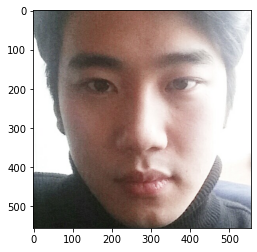

In [11]:
image_path = os.getenv('HOME')+'/aiffel/face_embedding/images/김창희얼굴/김창희5.JPG'

cropped_face = get_cropped_face(image_path)
plt.imshow(cropped_face)

In [12]:
dir_path_changhee = os.getenv('HOME')+'/aiffel/face_embedding/images/김창희얼굴'
file_list_changhee = os.listdir(dir_path_changhee)

print ("file_list: {}".format(file_list_changhee))

file_list: ['김창희1.jpg', '김창희4.JPG', '김창희3.JPG', '김창희2.JPG', '김창희5.JPG']


In [13]:
image_file_chaghee = os.path.join(dir_path_changhee, '김창희1.jpg')
face_chaghee = get_cropped_face(image_file_chaghee)   # 얼굴 영역을 구하는 함수(이전 스텝에서 구현)

# 얼굴 영역을 가지고 얼굴 임베딩 벡터를 구하는 함수
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

embedding = get_face_embedding(face_chaghee)  

/home/aiffel/aiffel/face_embedding/images/김창희얼굴/김창희1.jpg


In [14]:
from PIL import Image

def get_face_embedding_dict(dir_path,path_to_save):
    file_list = os.listdir(dir_path)
    embedding_dict = {}
    
    for file in file_list:
        image_file = os.path.join(dir_path, file)
        face = get_cropped_face(image_file)
        
        pillow_image = Image.fromarray(face)
        embedding = get_face_embedding(face)
        if len(embedding) > 0:  # 얼굴영역 face가 제대로 detect되지 않으면  len(embedding)==0인 경우가 발생하므로 
                    # os.path.splitext(file)[0]에는 이미지파일명에서 확장자를 제거한 이름이 담깁니다. 
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]
            pillow_image.save(path_to_save + os.path.splitext(file)[0] + '.jpg')
    
    return embedding_dict

In [6]:
save_path_changhee=os.getenv('HOME')+'/aiffel/face_embedding/images/김창희crop/'
embedding_dict_chahghee = get_face_embedding_dict(dir_path_changhee,save_path_changhee)

In [ ]:
#embedding_dict['김창희5']

### 내 얼굴간의 벡터 거리 구해보기

In [7]:
import numpy as np

def get_distance_ch_ch(name1, name2):
    return np.linalg.norm(embedding_dict_chahghee[name1]-embedding_dict_chahghee[name2], ord=2)

my_face_score=0
count =0
for i in range(1,6):
    for j in range(1,6):
        if i !=j :
            count +=1
            score=get_distance_ch_ch('김창희{}'.format(i),'김창희{}'.format(j))
            my_face_score +=score

mean_changhee_score=my_face_score/count
print('mean score :', mean_changhee_score)

mean score : 0.3217296315447409


  ### 1-2. 연예인 사진
   - 많이 모으기

In [8]:
dir_path_celeb = os.getenv('HOME')+'/aiffel/face_embedding/images/celebrity'
file_list_celeb = os.listdir(dir_path_celeb)

#print ("file_list: {}".format(file_list_celeb))

In [16]:
save_path_celeb=os.getenv('HOME')+'/aiffel/face_embedding/images/celebritycrop/'
embedding_dict_celeb = get_face_embedding_dict(dir_path_celeb,save_path_celeb)

/home/aiffel/aiffel/face_embedding/images/celebrity/류승범.jpg
/home/aiffel/aiffel/face_embedding/images/celebrity/성룡.jpg
/home/aiffel/aiffel/face_embedding/images/celebrity/이경규.jpeg
/home/aiffel/aiffel/face_embedding/images/celebrity/톰 홀랜드.jpg
/home/aiffel/aiffel/face_embedding/images/celebrity/정형돈.jpg
/home/aiffel/aiffel/face_embedding/images/celebrity/박해일.jpeg
/home/aiffel/aiffel/face_embedding/images/celebrity/대도서관.jpeg
/home/aiffel/aiffel/face_embedding/images/celebrity/고창석.jpeg
/home/aiffel/aiffel/face_embedding/images/celebrity/브래들리 쿠퍼.jpg
/home/aiffel/aiffel/face_embedding/images/celebrity/장원준.jpeg
/home/aiffel/aiffel/face_embedding/images/celebrity/개리.jpg
/home/aiffel/aiffel/face_embedding/images/celebrity/아이즈원조유리.jpeg
/home/aiffel/aiffel/face_embedding/images/celebrity/공유.jpg
/home/aiffel/aiffel/face_embedding/images/celebrity/조달환.png
/home/aiffel/aiffel/face_embedding/images/celebrity/김대명.jpeg
/home/aiffel/aiffel/face_embedding/images/celebrity/지민(BTS).jpg
/home/aiffel/aiffel/f

/home/aiffel/aiffel/face_embedding/images/celebrity/obama.jpg
/home/aiffel/aiffel/face_embedding/images/celebrity/크리스 에반스.jpg
/home/aiffel/aiffel/face_embedding/images/celebrity/트와이스정연.jpg
/home/aiffel/aiffel/face_embedding/images/celebrity/트와이스모모.jpeg
/home/aiffel/aiffel/face_embedding/images/celebrity/비니.jpg
/home/aiffel/aiffel/face_embedding/images/celebrity/마크 러팔로.jpeg
/home/aiffel/aiffel/face_embedding/images/celebrity/미미.jpg
/home/aiffel/aiffel/face_embedding/images/celebrity/승희.jpeg
/home/aiffel/aiffel/face_embedding/images/celebrity/도아.jpeg
/home/aiffel/aiffel/face_embedding/images/celebrity/하정우.jpg
/home/aiffel/aiffel/face_embedding/images/celebrity/진.jpg
/home/aiffel/aiffel/face_embedding/images/celebrity/수지.jpg
/home/aiffel/aiffel/face_embedding/images/celebrity/정민철.jpg
/home/aiffel/aiffel/face_embedding/images/celebrity/잭 니콜슨.jpeg
/home/aiffel/aiffel/face_embedding/images/celebrity/잇지유나.jpg
/home/aiffel/aiffel/face_embedding/images/celebrity/화사.jpg
/home/aiffel/aiffel/face_

/home/aiffel/aiffel/face_embedding/images/celebrity/이동국.jpeg
/home/aiffel/aiffel/face_embedding/images/celebrity/한석규.jpg
/home/aiffel/aiffel/face_embedding/images/celebrity/백윤식.png
/home/aiffel/aiffel/face_embedding/images/celebrity/김상호.png
/home/aiffel/aiffel/face_embedding/images/celebrity/이광수.jpg
/home/aiffel/aiffel/face_embedding/images/celebrity/야마다 타카유키.jpeg
/home/aiffel/aiffel/face_embedding/images/celebrity/티파니.jpg
/home/aiffel/aiffel/face_embedding/images/celebrity/박나래.jpeg
/home/aiffel/aiffel/face_embedding/images/celebrity/박보영.jpg
/home/aiffel/aiffel/face_embedding/images/celebrity/윤종신.jpeg


   
## 2. 얼굴 영역 자르기

 - 얼굴 Image Crop 후 파일 저장
 
```
    from PIL import Image
    face = get_cropped_face(image_path)
    pillow_image = Image.fromarray(face)
    pillow_image.save(path_to_save)
```
 ### - def get_face_embedding_dict 안에 구현완료


## 3. 얼굴 영역의 임베딩 추출.
 - 이미지 불러와서 임베딩 추출.
 - 다른사람의 임베딩은 구분하기 쉽게 따로 저장.
 
 
 - def get_face_embedding(face) : 얼굴영역으로부터 얼굴 임베딩 벡터를 구하는 함수
 - def get_face_embedding_dict(dir_path) : 디렉토리 안에 있는 모든 이미지의 임베딩 딕셔너리를 구하는 함수
 
 ### - def get_face_embedding_dict 안에 구현완료

## 4. 연예인 사진과 비교
 - def get_nearest_face(name,top =5)

In [ ]:
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict_chahghee[name1]-embedding_dict_chahghee[name2], ord=2)


In [ ]:
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

sort_key_func = get_sort_key_func('김창희1')   
sort_key_func('김창희2')

In [ ]:
sorted(embedding_dict_chahghee.items(), key=lambda x:sort_key_func(x[0]))

In [ ]:
def get_distance_ch_celeb(name1, name2):
    return np.linalg.norm(embedding_dict_chahghee[name1]-embedding_dict_celeb[name2], ord=2)

def get_sort_key_func_ch_celeb(name1):
    def get_distance_ch_celeb_from_name1(name2):
        return get_distance_ch_celeb(name1, name2)
    return get_distance_ch_celeb_from_name1

In [ ]:
sort_key_func_ch_celeb = get_sort_key_func_ch_celeb('김창희1')   
sort_key_func_ch_celeb('이정재')

In [ ]:
sorted(embedding_dict_celeb.items(), key=lambda x:sort_key_func_ch_celeb(x[0]))

In [ ]:
def get_nearest_face_ch_celeb(name, top=5):
    sort_key_func = get_sort_key_func_ch_celeb(name)
    sorted_faces = sorted(embedding_dict_celeb.items(), key=lambda x:sort_key_func(x[0]))

    for i in range(top):
        if i == 0 :   # 첫번째로 나오는 이름은 자기 자신일 것이므로 제외합시다. 
            continue
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))

In [ ]:
get_nearest_face_ch_celeb('김창희1')